# Following is a demo on the comparison of classifiers in the prescence of high dimensional gaussion noise

## Experiment Specifications

The following is modified from scikit learn's example on classifier comparison. 
Three synthetic datasets are created using the inbuilt functions from scikit learn - make_classification, make_moons and make circles as per the original demo.

Each input dataset is configured to have 100 samples and 2 dimensions(features) initially.

During the experiment, we sample gaussian noise of variance values = 0.1, 1, 10 spanning additional noise dimensions from 1 to 1000 in number.
Each noise dimension of a particular variance value is sampled and concatenated to the sampled input dataset. 
This is repeated across 50 trials per accuracy score with respect to the classifier.

We compare the accuracies across SVM, RF and KNN with respect to the number of noise dimensions through a plot of "Accuracy Vs. Noise Dimensions" 

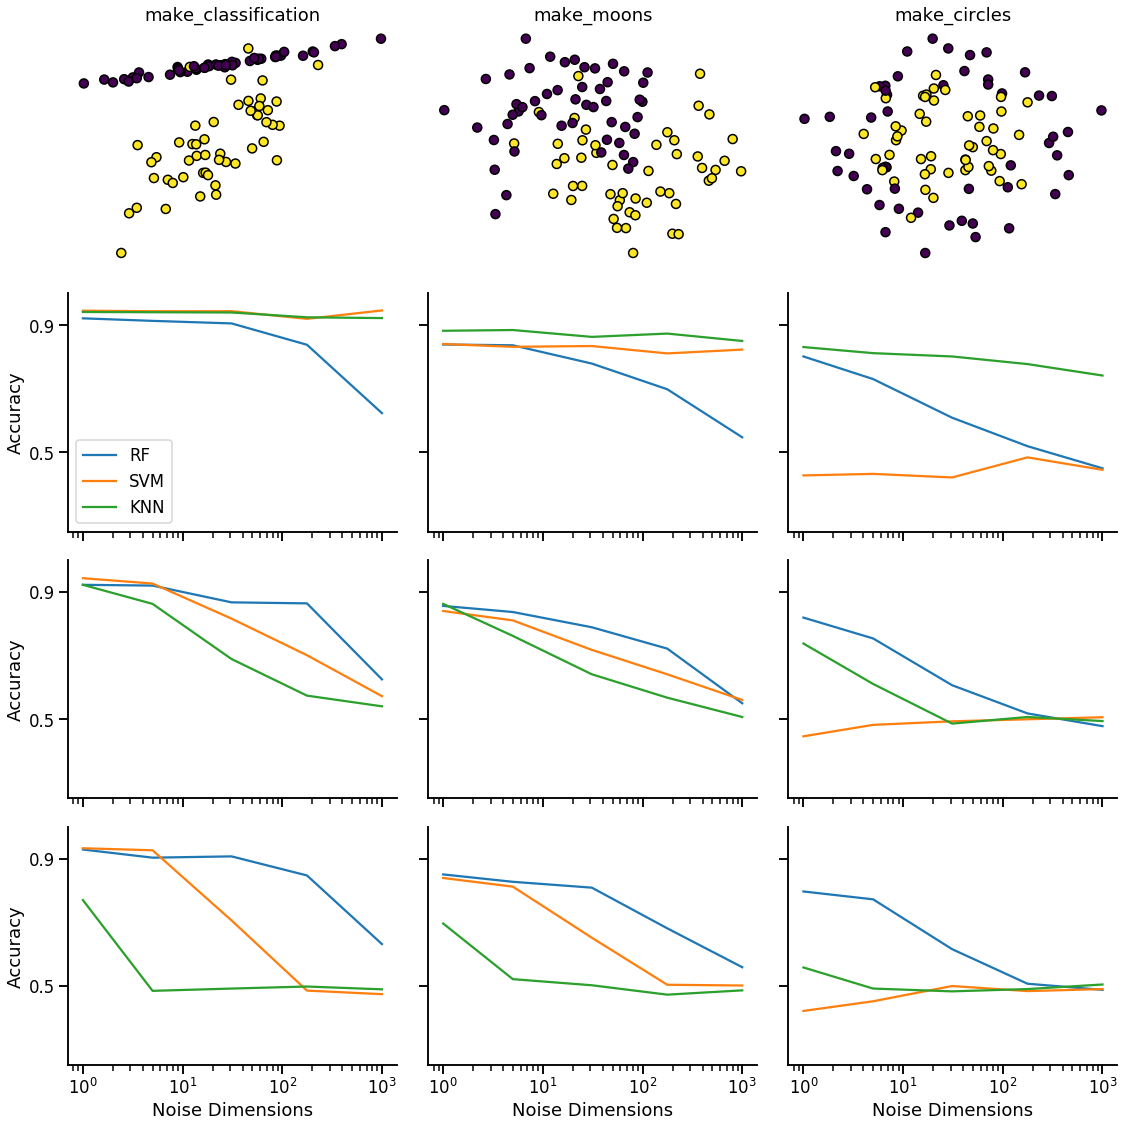

In [35]:
#import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns

#initialize the classifiers
names = ["SVM", "Random Forest", "KNN" ]
classifiers = [
          svm.SVC(kernel='linear'), 
          RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt'),
          KNeighborsClassifier(n_neighbors=3)]

#function to calculate the accuracy 
def fit_accuracy(train_data, train_label, size):
    accuracies = []
    for name, model in zip(names, classifiers):
        X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=size)
        
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]

    return SVM_acc,RF_acc,KNN_acc

#function to repeatedly add noise of a particular variance and dimension value
def add_noise(data, mu, var, dim):
    n = data.shape[0]
    noise = np.random.normal(mu, var, size = [n, dim])
    data = np.concatenate([data,noise],axis = 1)
    return data

#Initialization of input datasets
def datasets():
    X1,Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
    X1 = preprocessing.StandardScaler().fit_transform(X1)
    X2,Y2 = make_moons(noise=0.3)
    X2 = preprocessing.StandardScaler().fit_transform(X2)
    X3,Y3 = make_circles(noise=0.2, factor=0.5)
    X3 = preprocessing.StandardScaler().fit_transform(X3)
    
    input_data = [X1,X2,X3]
    input_label = [Y1,Y2,Y3]
    return input_data, input_label

#Function for plotting
def plot(rf,svm,knn,n1,axes):
    
    axes.plot(n1,rf)
    axes.plot(n1,svm)
    axes.plot(n1,knn)
    
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_xscale('log')
    axes.yaxis.set_major_locator(plt.MaxNLocator(2))

    
def run_classifier_comparison(ds, var, n_tr):
    
    noise_dims = np.geomspace(1, 1000, 5, dtype=int)
    n_sims = n_tr
    size = 0.25
    rf_acc = []
    svm_acc = []
    knn_acc = []
    n_dims = []
    mean_rf_acc = []
    mean_svm_acc = []
    mean_knn_acc = []

    for d in noise_dims:
        temp_acc1 = []
        temp_acc2 = []
        temp_acc3 = []
    
        for s in range(n_sims):
            da, lab = datasets()
            acc1, acc2, acc3 = fit_accuracy(add_noise(da[ds], 0, var, d), lab[ds], size)
        
            temp_acc1.append(acc1)
            temp_acc2.append(acc2)
            temp_acc3.append(acc3)
            n_dims.append(d)    
        
        rf_acc += temp_acc2
        svm_acc += temp_acc1
        knn_acc += temp_acc3
        
        mean_rf_acc.append(np.mean(temp_acc2))
        mean_svm_acc.append(np.mean(temp_acc1))
        mean_knn_acc.append(np.mean(temp_acc3))
        
    return mean_rf_acc,mean_svm_acc,mean_knn_acc,n_dims

sns.set_context('talk', font_scale=1)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,16))

#For plotting the input datasets
X,Y = datasets()
names=['make_classification','make_moons','make_circles']
for index in range(3):
    data = X[index]
    lab = pd.DataFrame(Y[index])
    lab['y'] = Y[index]
    
    axes[0][index].scatter(data[:,0],data[:,1], c = lab['y'], edgecolor='black')
    [s.set_visible(False) for s in axes[0][index].spines.values()]
    [t.set_visible(False) for t in axes[0][index].get_xticklines()]
    [t.set_visible(False) for t in axes[0][index].get_yticklines()]
    [m.set_visible(False) for m in  axes[0][index].set_yticklabels([])]
    [m.set_visible(False) for m in  axes[0][index].set_xticklabels([])]
    axes[0][index].set_title(names[index])



var = [0.1, 1, 10]
n_trial = 50
new_n = np.geomspace(1, 1000, 5, dtype=int)

for i in range(3):
    for j in range(3):
        r,s,k,n = run_classifier_comparison(i,var[j], n_trial)
        plot(r,s,k,new_n,axes[j+1][i])
        axes[j+1][i].set_yticks([0.5, 0.9])
        axes[j+1][i].set_ylim([0.25,1])
        
for k in range(3):
    axes[3][k].set_xlabel("Noise Dimensions")
    axes[k+1][0].set_ylabel("Accuracy")
    for l in range(1,3):
        [m.set_visible(False) for m in  axes[l][k].set_xticklabels([])]
        [m.set_visible(False) for m in  axes[k+1][l].set_yticklabels([])]
            

axes[1][0].legend(['RF', 'SVM', 'KNN'])
fig.tight_layout()
plt.savefig('New_plot.png')
    